In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Introduction
In the introduction, we plot just one figure related to papers publication over the years.
We read the Scopus and Web of Science data about the number of papers published with topic **Augmented Reality** and **Education**

In [3]:
with open('Scopus_analyze_2020_10_01.csv') as scopus_file:
    scopus_data = scopus_file.readlines()
scopus_data = scopus_data[8:]
scopus_data
years = []
papersScopus = []
for item in scopus_data:
    year, paper = item.split(',')
    years.append(int(''.join(filter(str.isdigit, year))))
    papersScopus.append(int(''.join(filter(str.isdigit, paper))))
years.reverse()
papersScopus.reverse()

with open('WoS_analyze_2020_10_01.txt') as wos_file:
    wos_data = wos_file.readlines()
wos_data = wos_data[1:-12] # restrict to >2006 to be consistent with Scopus data
papersWos = []
for item in wos_data:
    _, paper, _ = item.split("\t")
    papersWos.append(int(''.join(filter(str.isdigit, paper))))
papersWos.reverse()

df = pd.DataFrame(list(zip(years, papersScopus, papersWos)), 
               columns =['Years', 'Scopus', 'Wos'])
df.head()

,Years,Scopus,Wos
0,2006,29,17
1,2007,34,31
2,2008,45,25
3,2009,46,41
4,2010,57,47


Now we simply create a lineplot of the numbr of papers over the years

<Figure size 1080x504 with 0 Axes>

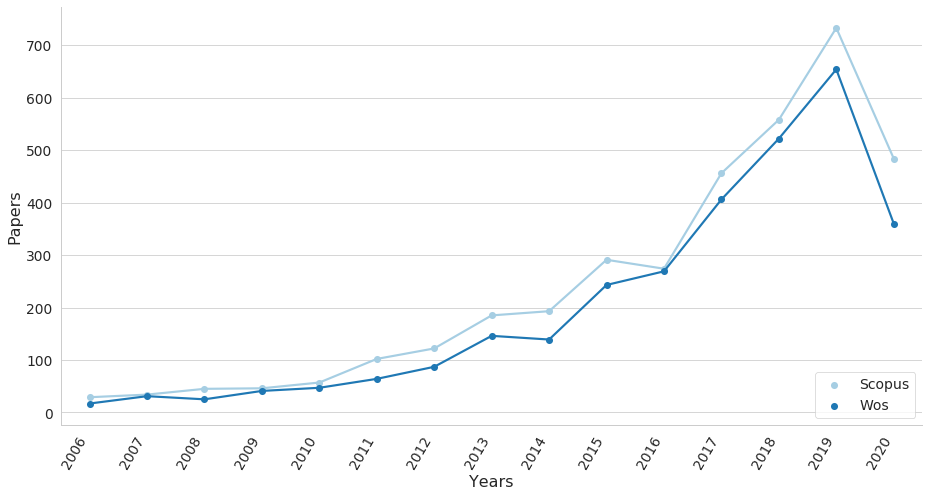

In [16]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.set_style("whitegrid")
sns.despine()
sns.set_palette(sns.color_palette("Paired"))
sns.set_context("paper", rc={"axes.titlesize":8,"axes.labelsize":16})

df_melt = df.melt('Years', var_name='Index',  value_name='Papers')
df_melt.head()

sns.catplot(x="Years", y="Papers", hue='Index',
            kind='point', height=7, aspect=13/7,
            legend=False, data=df_melt)

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='x-large'
)

plt.yticks(
    fontweight='normal',
    fontsize='x-large'
)

plt.legend(loc='lower right', prop={'size': 14})
plt.tight_layout()
plt.savefig('figures/papers_over_years.svg', dpi=300)

### Methodology

Ok, now we go to the second section, about methodology. What we want to compute in this case is the agreement between the different raters, that is Cohen's kappa, defined as

$\kappa = \frac{p_0-p_e}{1-p_e}$

where $p_0$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement.

We start first with the interrater agreement for the selction of papers reading the abstracts. 

In [3]:
papers_for_agreement = 50
accepted_R1 = 23
accepted_R2 = 24
discarded_R1 = papers_for_agreement - accepted_R1
discarded_R2 = papers_for_agreement - accepted_R2
both_accepted = 22
both_discarded = 25
only_R1_accepted = 1
only_R2_accepted = 2

p_zero = (both_accepted + both_discarded) / papers_for_agreement
p_R1_yes = accepted_R1 / papers_for_agreement
p_R1_no = discarded_R1 / papers_for_agreement
p_R2_yes = accepted_R2 / papers_for_agreement
p_R2_no = discarded_R2 / papers_for_agreement
p_e = p_R1_yes * p_R2_yes + p_R1_no * p_R2_no

kappa = (p_zero - p_e) / (1 - p_e)
kappa

0.8796147672552166

Now we do the same, but for the rater agreement after actually reading the paper. The sample size in this case is smaller, as only 10 papers were read by both researchers.

In [8]:
papers_for_agreement = 10
accepted_R1 = 2
accepted_R2 = 3
discarded_R1 = papers_for_agreement - accepted_R1
discarded_R2 = papers_for_agreement - accepted_R2
both_accepted = 2
both_discarded = 7
only_R1_accepted = 0
only_R2_accepted = 1

p_zero = (both_accepted + both_discarded) / papers_for_agreement
p_R1_yes = accepted_R1 / papers_for_agreement
p_R1_no = discarded_R1 / papers_for_agreement
p_R2_yes = accepted_R2 / papers_for_agreement
p_R2_no = discarded_R2 / papers_for_agreement

p_e = p_R1_yes * p_R2_yes + p_R1_no * p_R2_no

kappa = (p_zero - p_e) / (1 - p_e)
kappa

0.7368421052631581

### Results

Here we create the figures for section 3, reading the data from the spreadsheets containing the answers to the Google Form filled by the researchers after reading each paper

In [6]:
testers = [37,10,63,102,20,5,25,5,35,30,45,14,38,111,30,27,74,70,71,20,36,97,54,38,29,2,4,60,
106,92,32,93,68,58,23,60,70,35,8,8,15,20,18,26,24,66,58,290,60,50,20,5,76,31,24,33,24,24,38,52,
137,100,42,23,23,3,66,20,65]
len(testers)

69

In [7]:
df = pd.DataFrame({'Testers': testers})

In [9]:
fig = px.histogram(df, x="Testers", marginal="rug", nbins=20, color_discrete_sequence=['grey'], barmode="group")
fig.update_layout(paper_bgcolor = 'rgba(0,0,0,0)',
                  plot_bgcolor = 'rgba(0,0,0,0)',
                  xaxis = dict(
                    tickmode = 'linear',
                    tick0 = 0,
                    dtick = 20
                  ))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Black')
fig.show()